In [1]:
# hypotesis testing

# Data: 26% of the population were black. There was a sample of 100 men for a jury were 8 were black.
# Question: Is the sample representative of the population?

# Null Hypothesis: The sample is representative of the population.
# p_sample = p
# Alternative Hypothesis: The sample is not representative of the population. There was less black men than expected.
# p_sample < p

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

# We assume a binomial distribution for the population

# proportion
p = 0.26

# variance
var = p*(1-p)

# standard deviation
std = math.sqrt(var)

# sampling distribution of the sample proportion

# sample size
n = 100

# mean
mean = p

# standard deviation
std = std/math.sqrt(n)

# sample proportion
p_sample = 8/100

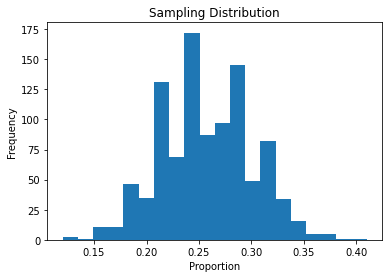

In [2]:
# simulation of the sampling distribution
# 1000 samples of size 100

# number of samples
n_samples = 1000

# proportions of the samples
p_samples = []

for i in range(n_samples):
    # sample
    sample = np.random.binomial(1, p, n)
    # append proportion by Maximum Likelihood Estimation
    p_samples.append(sample.mean())

# plot the sampling distribution, add title and labels
plt.hist(p_samples, bins=20)
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.show()

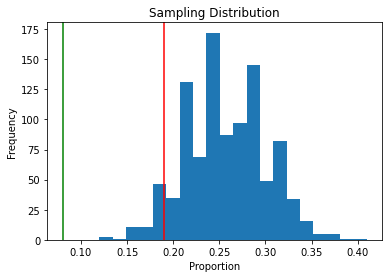

In [3]:
# draw a vertical line where 5% (one-sided test) of the sample proportion is
# draw a vertical line where the sample proportion is
plt.hist(p_samples, bins=20)
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.axvline(np.percentile(p_samples, 5), color='red')
plt.axvline(p_sample, color='green')
plt.show()


In [4]:
# p-value
# proportion of the sampling distribution that is greater than the sample proportion
# count the number of samples that are greater than the sample proportion

# convert the list to a numpy array
p_samples = np.array(p_samples)
count = len(p_samples[p_samples < p_sample])
p_value = count/n_samples
print('p-value:', p_value)

p-value: 0.0


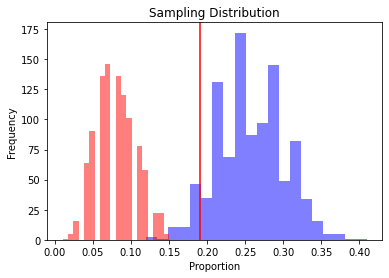

In [5]:
# type II error
# probability of accepting the null hypothesis when it is false
# If the null hypothesis is false, the population has another distribution.

# The new population distribution has a proportion of the sample proportion

p = p_sample

# simulate again the sampling distribution

# number of samples
n_samples = 1000

# proportions of the samples
p_samples_new = []

for i in range(n_samples):
    # sample
    sample = np.random.binomial(1, p, n)
    # append proportion by Maximum Likelihood Estimation
    p_samples_new.append(sample.mean())

# plot the new sampling distribution and the old one, side by side, transparent and with different colors
plt.hist(p_samples, bins=20, alpha=0.5, color='blue')
plt.hist(p_samples_new, bins=20, alpha=0.5, color='red')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
# draw a line where the decision boundary is
plt.axvline(np.percentile(p_samples, 5), color='red')
plt.show()

In [6]:
# type II error
# probability of accepting the null hypothesis when it is false

# convert the list to a numpy array
p_samples_new = np.array(p_samples_new)
# count the number of samples that are greater than the decision boundary in the new sampling distribution
count = len(p_samples_new[p_samples_new > np.percentile(p_samples, 5)])
type_ii_error = count/n_samples
print('type II error:', type_ii_error)

type II error: 0.0


In [7]:
# Conclusion

# The sample proportion is in the region of rejection, so we reject the null hypothesis.
# The sample is not representative of the population.

***

In [8]:
# The Kaiser Study from the 1960s collected data on birth weights and the smoking status of mothers. 
# The key question posed was whether babies born to smoking mothers have lower average birth weights. 
# This was compared to whether babies from both smoking and non-smoking mothers have the same average birth weights. 
# The null hypothesis (H0) proposed that they are from the "same" population distribution. 
# The alternative hypothesis (H1) suggested that babies from smoking mothers have a lower average birth weight.

# Data is in file baby.csv, import data and print the first 5 rows
import pandas as pd 
baby = pd.read_csv('baby.csv')
baby.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [9]:
# Filter data, only weight and smoke columns
baby = baby[['Birth Weight', 'Maternal Smoker']]
# Rename columns to Weight and Smoke
baby.columns = ['Weight', 'Smoke']
# Print the first 5 rows
baby.head()

,Weight,Smoke
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False


In [10]:
# Null Hypothesis: The babies from smoking mothers have the same average birth weights as babies from non-smoking mothers.
# In other words, the difference of the means of wieghts is zero.
# Alternative Hypothesis: The babies from smoking mothers have lower average birth weights than babies from non-smoking mothers.

# Population: all babies from smoking and non-smoking mothers
# Mean of the population
mean = baby['Weight'].mean()
# Standard deviation of the population
std = baby['Weight'].std()

# Sample's difference of the means of weights
sample_diff_of_means = baby[baby['Smoke'] == True]['Weight'].mean() - baby[baby['Smoke'] == False]['Weight'].mean()

# Sampling distribution of the difference of the means of weights
# Mean of the sampling distribution
mean_sampling = 0
# Standard Error of the sampling distribution, considering N1 and N2
# Count of the number of babies from smoking mothers
n1 = baby[baby['Smoke'] == True].count()[0]
# Count of the number of babies from non-smoking mothers
n2 = baby[baby['Smoke'] == False].count()[0]
# Standard Error of the baby's weight from smoking mothers
std1 = baby[baby['Smoke'] == True]['Weight'].std()
# Standard Error of the baby's weight from non-smoking mothers
std2 = baby[baby['Smoke'] == False]['Weight'].std()
# Standard Error of the sampling distribution
std_sampling = math.sqrt((std1**2/n1) + (std2**2/n2))

### [CHECK] Slide 9 week 7, apparently this can be a student's t distribution not a normal distribution

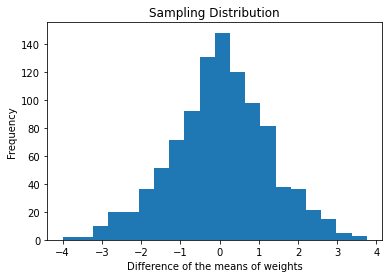

In [19]:
# Simulation of the sampling distribution with the null hypothesis (We are shuffling the data to indicate that there is no difference between the means of weights)
# 1000 samples of size 1000

# number of samples
n_samples = 1000

# differences of the means of weights of the samples
means_sampling = []

for i in range(n_samples):
    # sample
    sample = baby.sample(1000)
    #shuffle the sample
    sample['Smoke'] = sample['Smoke'].sample(frac=1).reset_index(drop=True)
    # append difference of the means of weights
    means_sampling.append(sample[sample['Smoke'] == True]['Weight'].mean() - sample[sample['Smoke'] == False]['Weight'].mean())

# plot the sampling distribution, add title and labels
plt.hist(means_sampling, bins=20)
plt.xlabel('Difference of the means of weights')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.show()

In [20]:
# Statistics of the sampling distribution simulation
# Mean of the sampling distribution
mean_sampling_simu = np.mean(means_sampling)
# Standard deviation of the sampling distribution
std_sampling_simu = np.std(means_sampling)

# compare the statistics of the sampling distribution simulation with the statistics of the theoretical sampling distribution
print('Theoretical Mean: ', mean_sampling)
print('Simulation Mean: ', mean_sampling_simu)
print('Theoretical Standard Deviation: ', std_sampling)
print('Simulation Standard Deviation: ', std_sampling_simu)

Theoretical Mean:  0
Simulation Mean:  0.03771258219031878
Theoretical Standard Deviation:  1.074152989360853
Simulation Standard Deviation:  1.2425005143727643


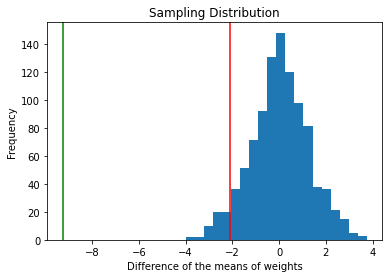

In [21]:
# Draw a vertical line where 5% and 95% of the distribution is
# Draw a vertical line where the sample proportion is
plt.hist(means_sampling, bins=20)
plt.xlabel('Difference of the means of weights')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.axvline(np.percentile(means_sampling, 5), color='red')
plt.axvline(sample_diff_of_means, color='green')


In [22]:
# p-value
# proportion of the sampling distribution that is smaller than the sample proportion
# count the number of samples that are smaller than the sample proportion

# convert the list to a numpy array
means_sampling = np.array(means_sampling)
count = len(means_sampling[means_sampling < sample_diff_of_means])
p_value = count/n_samples
print('p-value:', p_value)

p-value: 0.0


## method 1: Considering non-parametric distribution (shifting the mean)

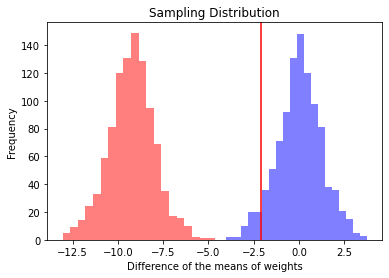

In [25]:
# Type II error
# probability of accepting the null hypothesis when it is false

# the new population distribution has a difference of the means of weights of the sample
mean_new = sample_diff_of_means

# simulate again the sampling distribution

# number of samples
n_samples = 1000

# differences of the means of weights of the samples
means_sampling_new = []

for i in range(n_samples):
    # sample
    sample = baby.sample(1000)
    #shuffle the sample
    sample['Smoke'] = sample['Smoke'].sample(frac=1).reset_index(drop=True)
    # the new value is shifted by the new mean
    temp = (sample[sample['Smoke'] == True]['Weight'].mean() - sample[sample['Smoke'] == False]['Weight'].mean()) + mean_new
    # append difference of the means of weights
    means_sampling_new.append(temp)

# plot the new sampling distribution and the old one, side by side, transparent and with different colors
plt.hist(means_sampling, bins=20, alpha=0.5, color='blue')
plt.hist(means_sampling_new, bins=20, alpha=0.5, color='red')
plt.xlabel('Difference of the means of weights')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
# draw a line where the decision boundary is
plt.axvline(np.percentile(means_sampling, 5), color='red')
plt.show()


## method 2: Considering a parametric distribution

In [26]:
# # Type II error
# # probability of accepting the null hypothesis when it is false

# # the new population distribution has a difference of the means of weights of the sample
# mean_new = sample_diff_of_means

# # simulate again the sampling distribution

# # number of samples
# n_samples = 1000

# # differences of the means of weights of the samples
# means_sampling_new = []

# for i in range(n_samples):
#     # sample
#     sample = np.random.normal(mean_new, std_sampling * math.sqrt(1000), 1000)
#     # append difference of the means of weights
#     means_sampling_new.append(sample.mean())

# # plot the new sampling distribution and the old one, side by side, transparent and with different colors
# plt.hist(means_sampling, bins=20, alpha=0.5, color='blue')
# plt.hist(means_sampling_new, bins=20, alpha=0.5, color='red')
# plt.xlabel('Difference of the means of weights')
# plt.ylabel('Frequency')
# plt.title('Sampling Distribution')
# # draw a line where the decision boundary is
# plt.axvline(np.percentile(means_sampling, 5), color='red')
# plt.show()


In [27]:
# type II error
# probability of accepting the null hypothesis when it is false

# convert the list to a numpy array
means_sampling_new = np.array(means_sampling_new)
# count the number of samples that are greater than the decision boundary in the new sampling distribution
count = len(means_sampling_new[means_sampling_new > np.percentile(means_sampling, 5)])
type_ii_error = count/n_samples
print('type II error:', type_ii_error)

type II error: 0.0


In [ ]:
# Conclusion

# The sample difference of the means of weights is in the region of rejection, so we reject the null hypothesis.